In [1]:
import sqlite3
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense

In [2]:
nom_base_de_donnees = "ma_base_de_donnees.db"

colonne1 = "Good_chords"
colonne2 = "notes"

df = pd.DataFrame()

# Connexion à la base de données
connexion = sqlite3.connect(nom_base_de_donnees)

# Liste des tables disponibles dans la base de données
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, connexion)['name']

for nom_table in tables:
    requete_sql = f"SELECT {colonne1}, {colonne2} FROM \"{nom_table}\""
    table_df = pd.read_sql_query(requete_sql, connexion)

    df = pd.concat([df, table_df], ignore_index=True)

# Fermeture de la connexion
connexion.close()


In [3]:
df['notes'] = df['notes'].str.replace(' ','')
df

,Good_chords,notes
0,NM,nan
1,EM,"['E','G#','B']"
2,AM,"['A','C#','E']"
3,EM,"['E','G#','B']"
4,BM,"['B','D#','F#']"
...,...,...
1006,AM,"['A','C#','E']"
1007,AM,"['A','C#','E']"
1008,DM,"['D','F#','A']"
1009,D9,"['D','F#','A','C','E']"


In [4]:
long = []

for val in df['notes']:
    long.append(len(val))

# La variable max_features devrait contenir la longueur maximale de vos séquences, pas la valeur maximale des longueurs
max_sequence_length = np.max(long)
max_features = 10

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10, split=',')
tokenizer.fit_on_texts(df['notes'].values)
X = tokenizer.texts_to_sequences(df['notes'].values)

# Ajoutez la spécification de la longueur maximale de la séquence (input_length) ici
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_sequence_length)

# Affichez la forme de X pour voir la longueur maximale
print("Shape of X:", X.shape)


Shape of X: (1011, 25)


In [5]:
max_sequence_length

25

In [6]:
nb_classe = len(np.unique(df['Good_chords']))
classes = np.unique(df['Good_chords'])
Y = pd.get_dummies(df['Good_chords'])
Y = Y.values
Y

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

In [7]:
classes

array(['A7', 'AM', 'Amaj7', 'Amaj7/E', 'Amin', 'Amin/C', 'B7', 'BM',
       'Bb7', 'BbM', 'Bmaj6', 'Bmin', 'C#7', 'C#min', 'C#min/G#', 'CM',
       'Cmin6', 'D9', 'DM', 'DM/E', 'DM/F#', 'E7', 'E7/G#', 'E9', 'EM',
       'Eaug', 'Eb7', 'Eb9', 'EbM', 'Ebmin', 'Emaj7', 'Emin', 'F#9',
       'F#M', 'F#min', 'F#min7', 'F#minmaj7', 'F9', 'FM', 'G#M', 'G#min',
       'G#min7', 'GM', 'Gmin', 'NM'], dtype=object)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(677, 25) (677, 45)
(334, 25) (334, 45)


In [21]:
embed_dim = 256
lstm_out = 196

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.4))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [9]:
embed_dim = 147
lstm_out = 196

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model2.add(tf.keras.layers.SpatialDropout1D(0.4))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model2.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [10]:
embed_dim = 147
lstm_out = 98

model2_2 = tf.keras.Sequential()
model2_2.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model2_2.add(tf.keras.layers.SpatialDropout1D(0.4))
model2_2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model2_2.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model2_2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [11]:
embed_dim = 147
lstm_out = 49

model2_3 = tf.keras.Sequential()
model2_3.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model2_3.add(tf.keras.layers.SpatialDropout1D(0.4))
model2_3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model2_3.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model2_3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [32]:
embed_dim = 147
lstm_out1 = 196
lstm_out2 = 50

model2_4 = tf.keras.Sequential()
model2_4.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model2_4.add(tf.keras.layers.SpatialDropout1D(0.4))
model2_4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out1, dropout=0.05, recurrent_dropout=0.2, return_sequences=True)))
model2_4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out1, dropout=0.05, recurrent_dropout=0.2)))
model2_4.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model2_4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [23]:
embed_dim = 12
lstm_out = 196

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model3.add(tf.keras.layers.SpatialDropout1D(0.4))
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model3.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [24]:
embed_dim = 73
lstm_out = 196

model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model4.add(tf.keras.layers.SpatialDropout1D(0.4))
model4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model4.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [25]:
embed_dim = 24
lstm_out = 196

model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model5.add(tf.keras.layers.SpatialDropout1D(0.4))
model5.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model5.add(tf.keras.layers.Dense(nb_classe, activation='softmax'))
model5.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, SimpleRNN,Input

lstm_out=10

model6 = Sequential([
    Input(shape=[None,1]),
    Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0)),
    Dense(nb_classe, activation="softmax"),
])
model6.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=20,validation_split=0.3)

In [ ]:
history2 = model2.fit(X_train, Y_train, epochs=20,validation_split=0.3)
history2_2 = model2_2.fit(X_train, Y_train, epochs=20,validation_split=0.3)
history2_3 = model2_3.fit(X_train, Y_train, epochs=20,validation_split=0.3)

In [ ]:
history2_4 = model2_4.fit(X_train, Y_train, epochs=20,validation_split=0.3)

In [29]:
history3 = model3.fit(X_train, Y_train, epochs=20,validation_split=0.3)

NameError: name 'model3' is not defined

In [ ]:
history4 = model4.fit(X_train, Y_train, epochs=20,validation_split=0.3)

In [ ]:
history5 = model5.fit(X_train, Y_train, epochs=20,validation_split=0.3)

In [84]:
history6 = model6.fit(X_train, Y_train, epochs=20,validation_split=0.3)

Epoch 1/20
15/15 [==============================] - 6s 90ms/step - loss: 3.8026 - accuracy: 0.0063 - val_loss: 3.7662 - val_accuracy: 0.0000e+00
Epoch 2/20
15/15 [==============================] - 0s 13ms/step - loss: 3.7174 - accuracy: 0.0317 - val_loss: 3.6846 - val_accuracy: 0.0245
Epoch 3/20
15/15 [==============================] - 0s 15ms/step - loss: 3.6202 - accuracy: 0.0423 - val_loss: 3.5837 - val_accuracy: 0.0000e+00
Epoch 4/20
15/15 [==============================] - 0s 18ms/step - loss: 3.4919 - accuracy: 0.0148 - val_loss: 3.4450 - val_accuracy: 0.0588
Epoch 5/20
15/15 [==============================] - 0s 17ms/step - loss: 3.3122 - accuracy: 0.0951 - val_loss: 3.2722 - val_accuracy: 0.0490
Epoch 6/20
15/15 [==============================] - 0s 16ms/step - loss: 3.1197 - accuracy: 0.1205 - val_loss: 3.1366 - val_accuracy: 0.0490
Epoch 7/20
15/15 [==============================] - 0s 21ms/step - loss: 2.9876 - accuracy: 0.1205 - val_loss: 3.0551 - val_accuracy: 0.0490
Epoch

In [30]:
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.4083 - accuracy: 0.9491 - 229ms/epoch - 38ms/step
score: 0.41
acc: 0.95


In [13]:
score, acc = model2.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score, acc = model2_2.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score, acc = model2_3.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.4701 - accuracy: 0.9581 - 206ms/epoch - 34ms/step
score: 0.47
acc: 0.96
6/6 - 0s - loss: 0.4920 - accuracy: 0.9341 - 106ms/epoch - 18ms/step
score: 0.49
acc: 0.93
6/6 - 0s - loss: 0.7064 - accuracy: 0.9042 - 91ms/epoch - 15ms/step
score: 0.71
acc: 0.90


In [34]:
score, acc = model2_4.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))


6/6 - 2s - loss: 0.4456 - accuracy: 0.9461 - 2s/epoch - 273ms/step
score: 0.45
acc: 0.95


In [32]:
score, acc = model3.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.7817 - accuracy: 0.8922 - 131ms/epoch - 22ms/step
score: 0.78
acc: 0.89


In [33]:
score, acc = model4.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.5724 - accuracy: 0.9222 - 144ms/epoch - 24ms/step
score: 0.57
acc: 0.92


In [37]:
score, acc = model5.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

6/6 - 0s - loss: 0.7507 - accuracy: 0.8383 - 138ms/epoch - 23ms/step
score: 0.75
acc: 0.84


NameError: name 'history' is not defined

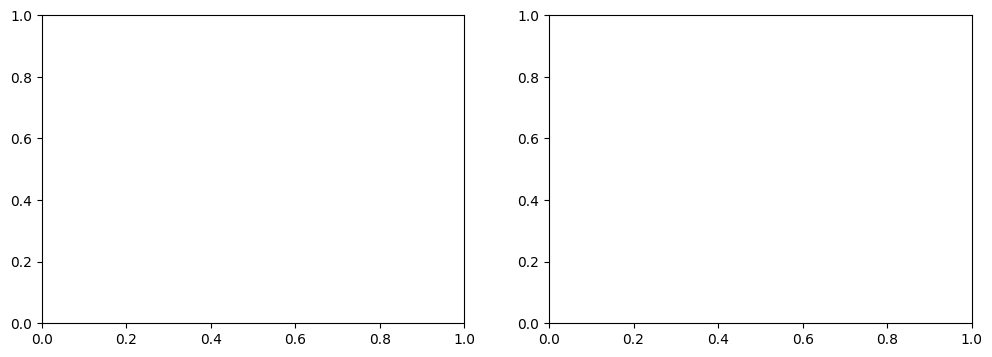

In [81]:
import matplotlib.pyplot as plt

# Créez une figure avec une grille de sous-graphiques 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Ajustez la taille de la figure selon vos besoins

# Premier sous-graphique (précisez le nombre d'époques dans 'range(len(history1['accuracy']))')
axs[0].plot(range(len(history.history['accuracy'])), history.history['accuracy'], color='r')
axs[0].plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'],linestyle='--', color='r', alpha=0.5)
axs[0].plot(range(len(history2.history['accuracy'])), history2.history['accuracy'], label='train',color='b')
axs[0].plot(range(len(history2.history['val_accuracy'])), history2.history['val_accuracy'],linestyle='--', color='b', alpha=0.5)
axs[0].plot(range(len(history3.history['accuracy'])), history3.history['accuracy'], color='g')
axs[0].plot(range(len(history3.history['val_accuracy'])), history3.history['val_accuracy'], linestyle='--', color='g', alpha=0.5)
axs[0].plot(range(len(history4.history['accuracy'])), history4.history['accuracy'],color='y')
axs[0].plot(range(len(history4.history['val_accuracy'])), history4.history['val_accuracy'], linestyle='--', color='y', alpha=0.5)

axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')


axs[1].plot(range(len(history.history['loss'])), history.history['loss'], label='train 295',color='r')
axs[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='validation',linestyle='--', color='r', alpha=0.5)
axs[1].plot(range(len(history2.history['loss'])), history2.history['loss'], label='train 147',color='b')
axs[1].plot(range(len(history2.history['val_loss'])), history2.history['val_loss'], label='validation',linestyle='--', color='b', alpha=0.5)
axs[1].plot(range(len(history3.history['loss'])), history3.history['loss'], label='train 12',color='g')
axs[1].plot(range(len(history3.history['val_loss'])), history3.history['val_loss'], label='validation',linestyle='--', color='g', alpha=0.5)
axs[1].plot(range(len(history4.history['loss'])), history4.history['loss'], label='train 73',color='y')
axs[1].plot(range(len(history4.history['val_loss'])), history4.history['val_loss'], label='validation',linestyle='--', color='y', alpha=0.5)
axs[1].plot(range(len(history5.history['loss'])), history5.history['loss'], label='train 24',color='c')
axs[1].plot(range(len(history5.history['val_loss'])), history5.history['val_loss'], label='validation',linestyle='--', color='c', alpha=0.5)

axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='upper left')

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

axs.flatten()[-1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Affichez la figure
plt.show()


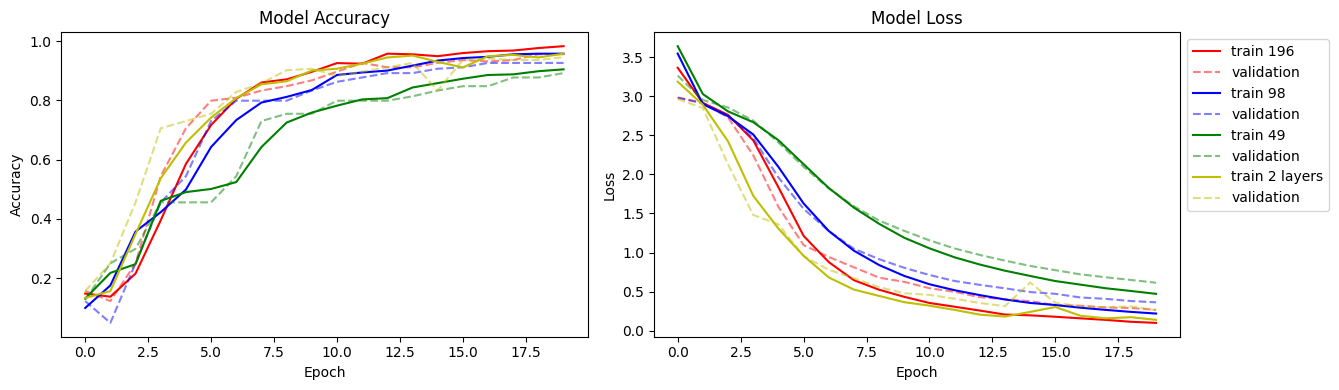

In [37]:
import matplotlib.pyplot as plt

# Créez une figure avec une grille de sous-graphiques 1x2
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Ajustez la taille de la figure selon vos besoins

# Premier sous-graphique (précisez le nombre d'époques dans 'range(len(history1['accuracy']))')
axs[0].plot(range(len(history2.history['accuracy'])), history2.history['accuracy'], color='r')
axs[0].plot(range(len(history2.history['val_accuracy'])), history2.history['val_accuracy'],linestyle='--', color='r', alpha=0.5)
axs[0].plot(range(len(history2_2.history['accuracy'])), history2_2.history['accuracy'], label='train',color='b')
axs[0].plot(range(len(history2_2.history['val_accuracy'])), history2_2.history['val_accuracy'],linestyle='--', color='b', alpha=0.5)
axs[0].plot(range(len(history2_3.history['accuracy'])), history2_3.history['accuracy'], color='g')
axs[0].plot(range(len(history2_3.history['val_accuracy'])), history2_3.history['val_accuracy'], linestyle='--', color='g', alpha=0.5)
axs[0].plot(range(len(history2_4.history['accuracy'])), history2_4.history['accuracy'], color='y')
axs[0].plot(range(len(history2_4.history['val_accuracy'])), history2_4.history['val_accuracy'], linestyle='--', color='y', alpha=0.5)

axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')


axs[1].plot(range(len(history2.history['loss'])), history2.history['loss'], label='train 196',color='r')
axs[1].plot(range(len(history2.history['val_loss'])), history2.history['val_loss'], label='validation',linestyle='--', color='r', alpha=0.5)
axs[1].plot(range(len(history2_2.history['loss'])), history2_2.history['loss'], label='train 98',color='b')
axs[1].plot(range(len(history2_2.history['val_loss'])), history2_2.history['val_loss'], label='validation',linestyle='--', color='b', alpha=0.5)
axs[1].plot(range(len(history2_3.history['loss'])), history2_3.history['loss'], label='train 49',color='g')
axs[1].plot(range(len(history2_3.history['val_loss'])), history2_3.history['val_loss'], label='validation',linestyle='--', color='g', alpha=0.5)
axs[1].plot(range(len(history2_4.history['loss'])), history2_4.history['loss'],label='train 2 layers', color='y')
axs[1].plot(range(len(history2_4.history['val_loss'])), history2_4.history['val_loss'], label='validation',linestyle='--', color='y', alpha=0.5)


axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='upper left')

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

axs.flatten()[-1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Affichez la figure
plt.show()


In [99]:
import conversion_notes
from importlib import reload
reload(conversion_notes)

<module 'conversion_notes' from 'c:\\Users\\lucie\\Documents\\Programmation\\PFE_Analayse_musicale\\Chords_analysis\\rnn\\conversion_notes.py'>

In [102]:
dataframe_test

,start,end,chords,NomFichier
0,0.0,0.000,N,It_Won't_Be_Long
1,0.0,1.511,N,It_Won't_Be_Long
2,1.511,4.936,C,It_Won't_Be_Long
3,4.936,6.678,G:9,It_Won't_Be_Long
4,6.678,11.129,N,It_Won't_Be_Long
...,...,...,...,...
157,144.627029 146.089886 D,NaN,NaN,The_Night_Before
158,146.089886 147.552743 F,NaN,NaN,The_Night_Before
159,147.552743 148.934331 D,NaN,NaN,The_Night_Before
160,148.934331 152.521576 D,NaN,NaN,The_Night_Before


In [107]:
import conversion_notes
dossier_test = r"C:\Users\lucie\Documents\Programmation\Beatles\test\autre"

dataframe_test = conversion_notes.create_df(dossier_test)
res = conversion_notes.cleaning_df(dataframe_test)

res['notes'] = res['notes'].str.replace(' ','')
res.head()

,start,end,chords,NomFichier,Decompo,Good_chords,notes,taille_sequence
0,0.000,0.000,N,Mr_Morgan,"['N', 'M', ' ']",NM,nan,NaN
1,0.000,1.150,N,Mr_Morgan,"['N', 'M', ' ']",NM,nan,NaN
2,1.150,3.294,D,Mr_Morgan,"['D', 'M', ' ']",DM,"['D','F#','A']",3.0
3,3.294,4.063,G,Mr_Morgan,"['G', 'M', ' ']",GM,"['G','B','D']",3.0
4,4.063,5.734,D,Mr_Morgan,"['D', 'M', ' ']",DM,"['D','F#','A']",3.0


In [108]:
seq = res['notes']

# Convertissez les séquences en représentations numériques
twt_sequences = tokenizer.texts_to_sequences(seq)
# Remplacez les valeurs manquantes par des zéros
twt_padded = tf.keras.preprocessing.sequence.pad_sequences(twt_sequences, maxlen=X.shape[1], dtype='int32', value=0)

In [109]:
# Effectuez la prédiction avec votre modèle
predictions = model2.predict(twt_padded, batch_size=len(seq))
pred = []

# Affichez les résultats pour chaque séquence
for i, prediction in enumerate(predictions):
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]
    pred.append(predicted_class)
    print(f"Séquence {i+1} - Classe prédite : {predicted_class}")

1/1 [==============================] - 0s 104ms/step
Séquence 1 - Classe prédite : NM
Séquence 2 - Classe prédite : NM
Séquence 3 - Classe prédite : DM
Séquence 4 - Classe prédite : GM
Séquence 5 - Classe prédite : DM
Séquence 6 - Classe prédite : GM
Séquence 7 - Classe prédite : DM
Séquence 8 - Classe prédite : AM
Séquence 9 - Classe prédite : DM
Séquence 10 - Classe prédite : DM
Séquence 11 - Classe prédite : GM
Séquence 12 - Classe prédite : DM
Séquence 13 - Classe prédite : GM
Séquence 14 - Classe prédite : DM
Séquence 15 - Classe prédite : AM
Séquence 16 - Classe prédite : DM
Séquence 17 - Classe prédite : DM
Séquence 18 - Classe prédite : GM
Séquence 19 - Classe prédite : DM
Séquence 20 - Classe prédite : GM
Séquence 21 - Classe prédite : DM
Séquence 22 - Classe prédite : GM
Séquence 23 - Classe prédite : AM
Séquence 24 - Classe prédite : DM
Séquence 25 - Classe prédite : GM
Séquence 26 - Classe prédite : DM
Séquence 27 - Classe prédite : GM
Séquence 28 - Classe prédite : DM
Séqu

In [110]:
count = 0
faux_pred = []
real = []

for i in range(len(pred)):
    if pred[i] == res['Good_chords'][i]:
        count+=1
    else:
        faux_pred.append(pred[i])
        real.append(res['Good_chords'][i])

count/len(pred) * 100

90.57971014492753

In [2]:
import pandas as pd

file = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_analysis\rnn\out.csv"
df_aam = pd.read_csv(file)
df_aam['notes'] = df_aam['notes'].fillna('nan')
df_aam['notes'] = df_aam['notes'].str.replace(' ','')

test_aam = df_aam[:183]
test_aam

,Unnamed: 0,StartTime,Chordsname,notes
0,"0,0.65217394,Fmaj,""['F', 'A', 'C']""",NaN,NaN,nan
1,"1,1.3043479,Fmaj,""['F', 'A', 'C']""",NaN,NaN,nan
2,"2,1.9565217,Fmaj,""['F', 'A', 'C']""",NaN,NaN,nan
3,"3,2.6086957,A#maj,""['A#', 'C##', 'E#']""",NaN,NaN,nan
4,"4,3.2608697,A#maj,""['A#', 'C##', 'E#']""",NaN,NaN,nan
...,...,...,...,...
178,"178,116.739136,Dmin,""['D', 'F', 'A']""",NaN,NaN,nan
179,"179,117.39131,Gmin,""['G', 'Bb', 'D']""",NaN,NaN,nan
180,"180,118.04349,Gmin,""['G', 'Bb', 'D']""",NaN,NaN,nan
181,"181,118.695656,Gmin,""['G', 'Bb', 'D']""",NaN,NaN,nan


In [112]:
seq = test_aam['notes']

# Convertissez les séquences en représentations numériques
twt_sequences = tokenizer.texts_to_sequences(seq)
# Remplacez les valeurs manquantes par des zéros
twt_padded = tf.keras.preprocessing.sequence.pad_sequences(twt_sequences, maxlen=X.shape[1], dtype='int32', value=0)

In [113]:
# Effectuez la prédiction avec votre modèle
predictions = model2.predict(twt_padded, batch_size=len(seq))
pred = []

# Affichez les résultats pour chaque séquence
for i, prediction in enumerate(predictions):
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]
    pred.append(predicted_class)
    print(f"Séquence {i+1} - Classe prédite : {predicted_class}")

1/1 [==============================] - 0s 114ms/step
Séquence 1 - Classe prédite : FM
Séquence 2 - Classe prédite : FM
Séquence 3 - Classe prédite : FM
Séquence 4 - Classe prédite : F#min
Séquence 5 - Classe prédite : F#min
Séquence 6 - Classe prédite : F#min
Séquence 7 - Classe prédite : F#min
Séquence 8 - Classe prédite : Amin
Séquence 9 - Classe prédite : Amin
Séquence 10 - Classe prédite : FM
Séquence 11 - Classe prédite : FM
Séquence 12 - Classe prédite : FM
Séquence 13 - Classe prédite : FM
Séquence 14 - Classe prédite : FM
Séquence 15 - Classe prédite : FM
Séquence 16 - Classe prédite : CM
Séquence 17 - Classe prédite : CM
Séquence 18 - Classe prédite : CM
Séquence 19 - Classe prédite : CM
Séquence 20 - Classe prédite : FM
Séquence 21 - Classe prédite : FM
Séquence 22 - Classe prédite : FM
Séquence 23 - Classe prédite : FM
Séquence 24 - Classe prédite : FM
Séquence 25 - Classe prédite : FM
Séquence 26 - Classe prédite : FM
Séquence 27 - Classe prédite : FM
Séquence 28 - Classe p

In [114]:
count = 0
faux_pred = []
real = []

for i in range(len(pred)):
    if pred[i] == test_aam['Chordsname'][i]:
        count+=1
    else:
        faux_pred.append(pred[i])
        real.append(test_aam['Chordsname'][i])

count/len(pred) * 100

18.579234972677597